In [316]:
# Unit 4 Homework Assignment: A Whale Off the Port(folio)
      
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime as dt
from pathlib import Path
%matplotlib inline

#print(f"Current Working Directory: {Path.cwd()}")

Current Working Directory: C:\Users\Anirban\Desktop\Python Code folder\pandas homework


In [317]:
# Reading whale returns CSV file into DataFrame
whale_returns = Path("Resources/whale_returns.csv")               
whale_returns_df = pd.read_csv(whale_returns,index_col="Date", parse_dates=True, infer_datetime_format=True )
# Sort data by `Date` in ascending order - sort values works too, as does sort index
whale_returns_df = whale_returns_df.sort_values("Date")
whale_returns_df.tail()
#whale_returns_df.count()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [318]:
# Count nulls in whale returns DataFrame
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [319]:
# Drop nulls from whale returns DataFrame
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [320]:
# Reading algorithmic trading portfolio returns CSV file into DataFrame
algo_returns = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns,index_col="Date", parse_dates=True, infer_datetime_format=True )
# Sort data by `Date` in ascending order - sort values works too, as does sort index
algo_returns_df = algo_returns_df.sort_values("Date")
algo_returns_df.head(7)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285


In [321]:
# Count nulls in algorithmic trading portfolio DataFrame
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [322]:
# Drop nulls from algorithmic trading portfolio DataFrame
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [323]:
# Reading S&P 500 historical price CSV file into DataFrame
sp500_history = Path("Resources/sp500_history.csv")                
sp500_history_df = pd.read_csv(sp500_history,index_col="Date", parse_dates=True, infer_datetime_format=True )
# Sort data by `Date` in ascending order
sp500_history_df = sp500_history_df.sort_values("Date")
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [324]:
# Count nulls in S&P 500 historical price DataFrame
sp500_history_df.isnull().sum()

Close    0
dtype: int64

In [325]:
# Check Data Types in S&P 500 historical price DataFrame
sp500_history_df.dtypes

Close    object
dtype: object

In [326]:
# Fixing Data Types of S&P 500 historical price DataFrame by replacing $ sign and converting the datatype using 'as_type` function
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '').astype(float)
sp500_history_df.dtypes

Close    float64
dtype: object

In [327]:
# Checking f $ sign was removed
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [328]:
# Calculate Daily Returns and dropping null values
sp500_history_df = sp500_history_df.pct_change().dropna().copy()
sp500_history_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [329]:
# Rename Column from Close to "S&P 500"
sp500_history_df.columns.values[0] = "S&P 500"
sp500_history_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [330]:
## Combine Whale, Algorithmic, and S&P 500 Returns
combined_portfolios_df = pd.concat(
    [whale_returns_df,algo_returns_df, sp500_history_df], axis="columns", join="inner"
)
combined_portfolios_df
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


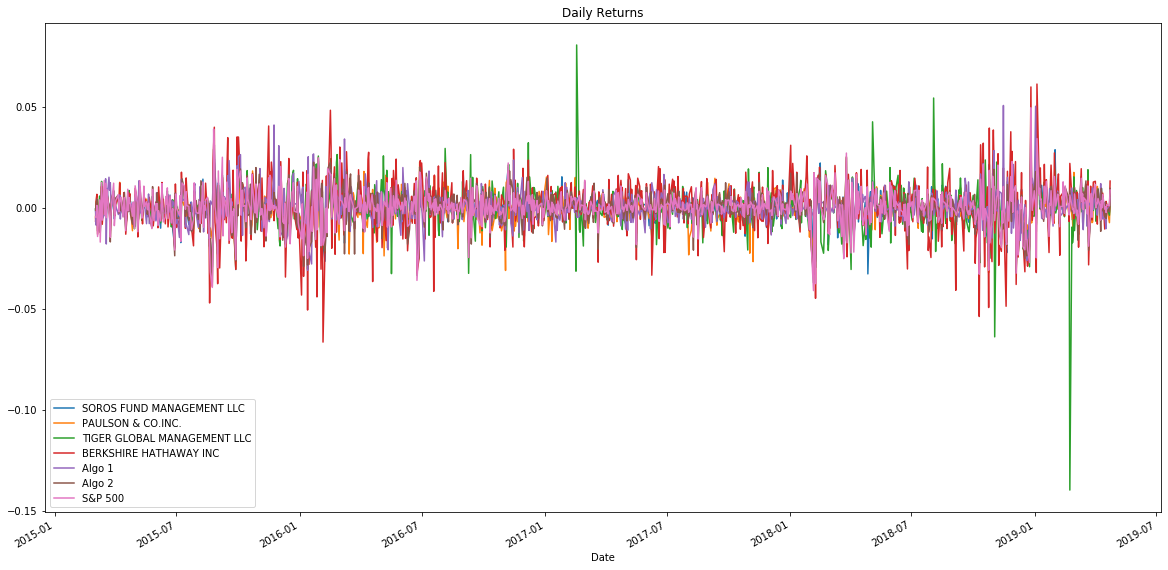

In [331]:
#Portfolio Analysis - calculate and visualize performance and risk metrics for the portfolios

# Plotting the daily returns and cumulative returns.
combined_portfolios_df.plot(title='Daily Returns', figsize=(20,10))

In [332]:
# Calculate cumulative returns
cumulative_returns = (1 + combined_portfolios_df).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


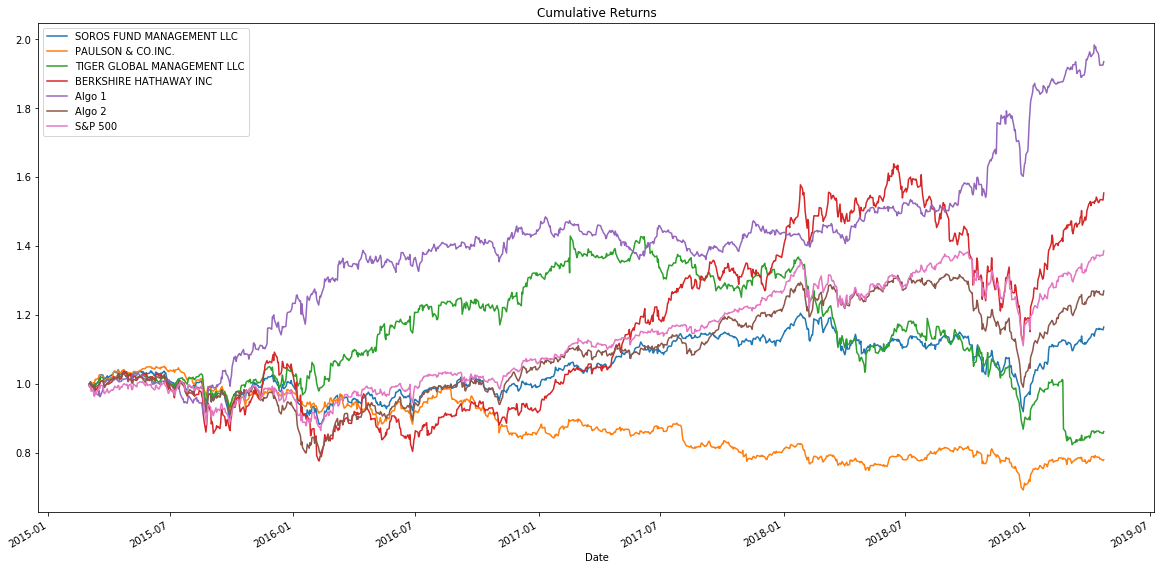

In [333]:
# Plotting cumulative returns
cumulative_returns.plot(title='Cumulative Returns', figsize=(20,10))

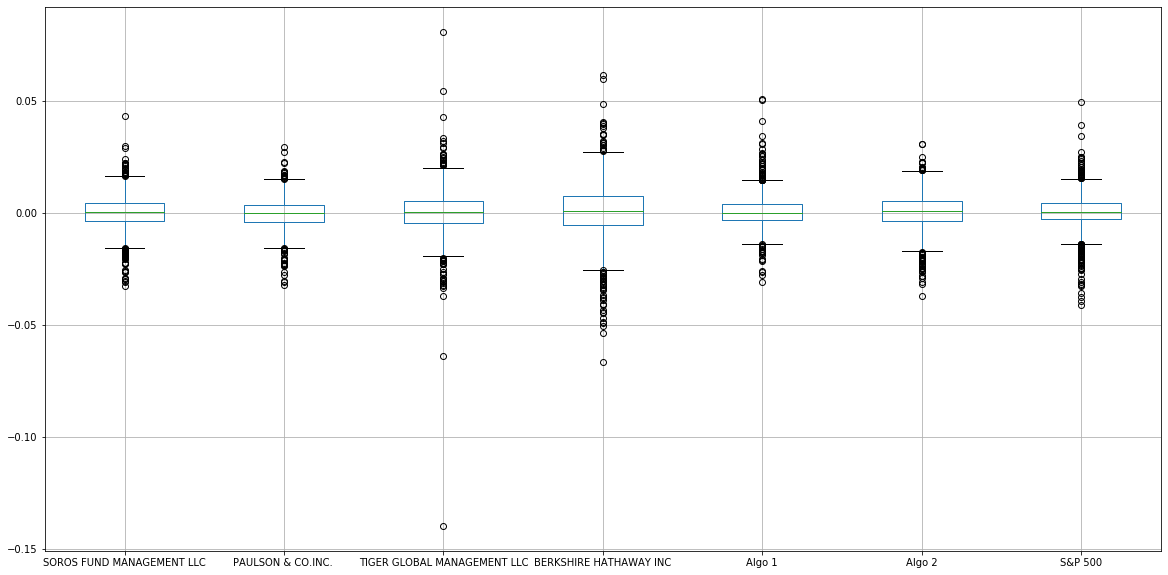

In [334]:
# Box plot to visually show risk
combined_portfolios_df.boxplot(figsize=(20,10))

In [335]:
# Calculate the standard deviation for each portfolio
combined_portfolios_std = combined_portfolios_df.std()
combined_portfolios_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [336]:
# Which portfolios are riskier than the S&P 500?
for i in range(len(combined_portfolios_std)):
    if(combined_portfolios_std[i] > combined_portfolios_std['S&P 500']):      
        tag = "True"  
        name = combined_portfolios_std.index[i]  
    else:
        tag = "False"
        name = combined_portfolios_std.index[i]  
    print(f"{name} {tag}")
#The Standard deviation of TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC is higher than the STD of S&P 500

SOROS FUND MANAGEMENT LLC False
PAULSON & CO.INC.  False
TIGER GLOBAL MANAGEMENT LLC True
BERKSHIRE HATHAWAY INC True
Algo 1 False
Algo 2 False
S&P 500 False


In [337]:
# Calculate the annualized standard deviation (252 trading days)
combined_portfolios_annualized_std = combined_portfolios_std * np.sqrt(252)
combined_portfolios_annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

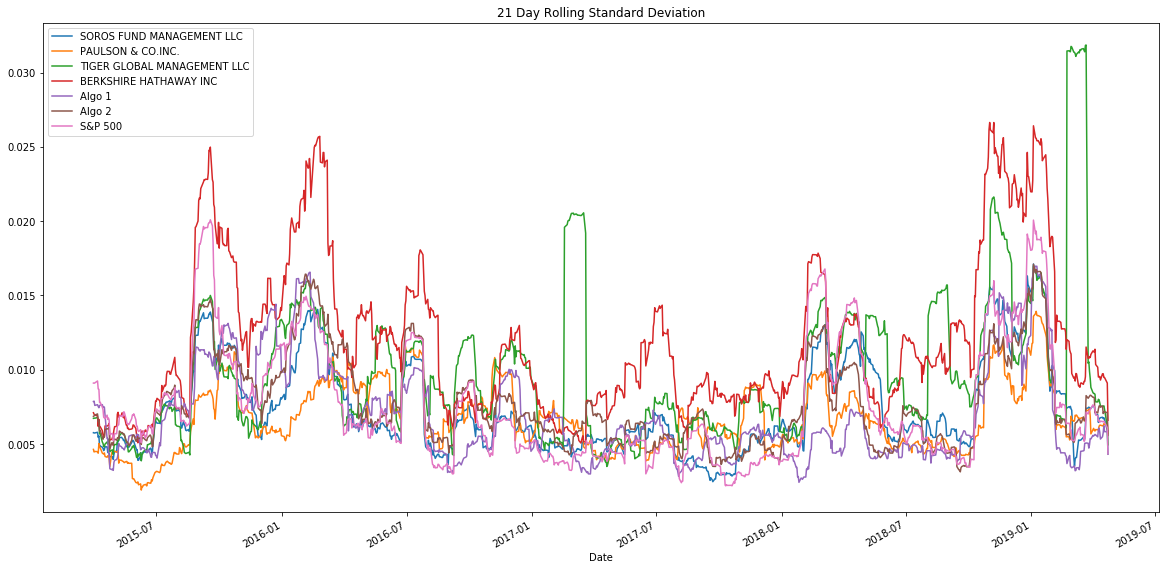

In [338]:
#Rolling Statistics - Risk changes over time. Analyze the rolling statistics for Risk and Beta.

#Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 trading day window

#sorting before the moving averages
combined_portfolios_df = combined_portfolios_df.sort_index()
#Calculating rolling std using 21 trading day window
rolling_std = combined_portfolios_df.rolling(window=21).std().plot(title = '21 Day Rolling Standard Deviation', figsize =[20,10])
#plotting
rolling_std

In [339]:
#Construct a correlation table
correlation_table = combined_portfolios_df.corr()
correlation_table

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


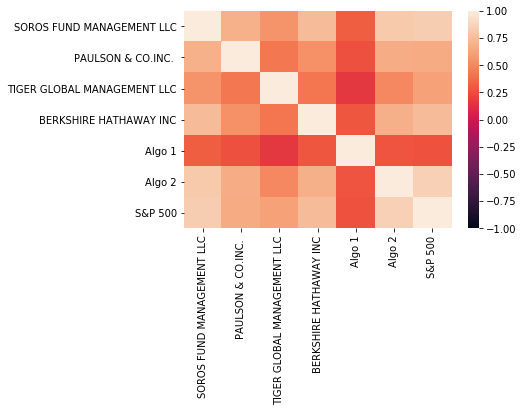

In [340]:
#correlation matrix using a heatmap
sns.heatmap(correlation_table, vmin=-1, vmax=1)

In [341]:
#Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

#Calculate the total variance of the S&P 500 daily returns.
total_variance =combined_portfolios_df["S&P 500"].var()
#Calculate the overall covariances of BERKSHIRE HATHAWAY INC stock to that of the S&P 500. 
cov_berkshire = combined_portfolios_df['BERKSHIRE HATHAWAY INC'].cov(combined_portfolios_df['S&P 500'])
#Calculate the overall beta values of each social media stock.
beta_berkshire = cov_berkshire / total_variance
print(beta_berkshire)

1.1347891297491723


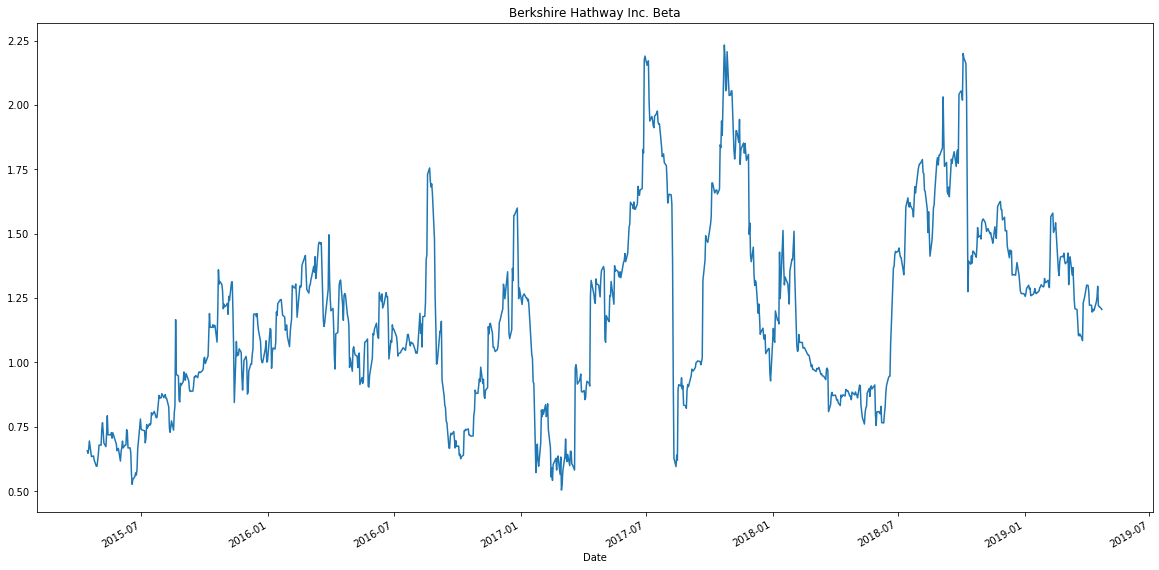

In [342]:
# Calculate a rolling window
rolling_variance = combined_portfolios_df["S&P 500"].rolling(window=30).var()
rolling_covariance = combined_portfolios_df["BERKSHIRE HATHAWAY INC"].rolling(window=30).cov(combined_portfolios_df["S&P 500"])
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(title="Berkshire Hathway Inc. Beta", figsize=[20,10])

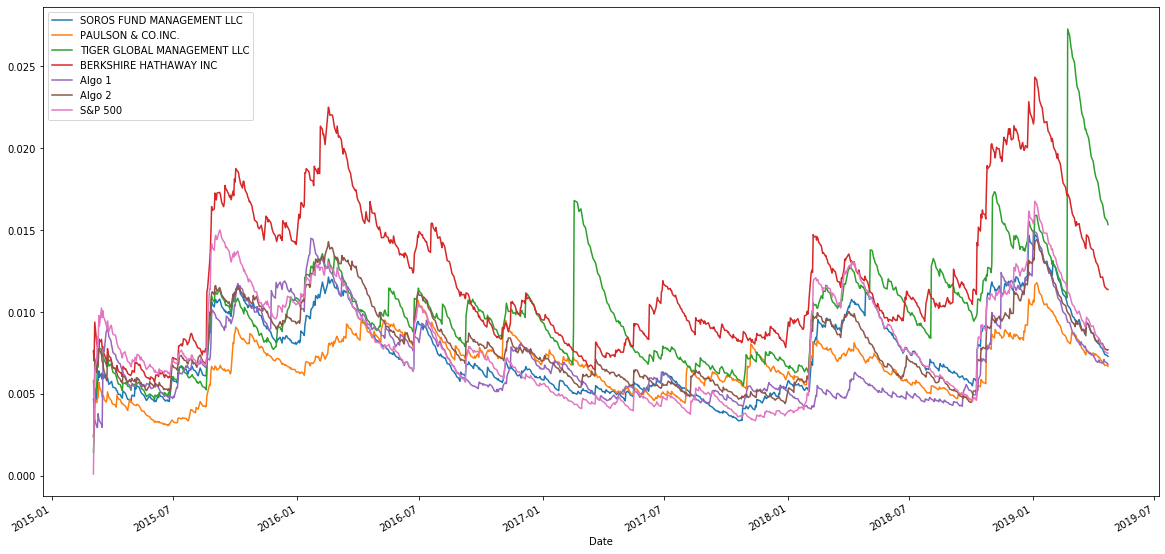

In [343]:
# Calculate a rolling window using the exponentially weighted moving average.
rolling_ewma = combined_portfolios_df.apply(lambda x: x.ewm(halflife=21).std()).plot(figsize=[20,10])
rolling_ewma

In [344]:
#5. Calculate the Sharpe ratios by computing the quotient of `annualized average return` and `annualized standard deviation`.
sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std()* np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

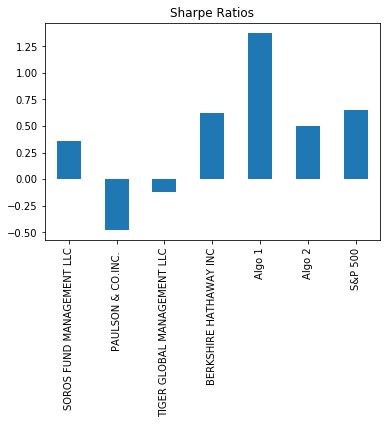

In [345]:
#6. Plot the Sharpe ratios using a bar chart.
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [346]:
#On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? 
for i in range(len(sharpe_ratios)):
    if(sharpe_ratios['Algo 1'] > sharpe_ratios[i]):      
        tag = "Algo 1 outperforms whales and market since Sharpe Ratio of Algo 1 is higher than both"  
    elif(sharpe_ratios['Algo 2'] > sharpe_ratios[i]):
        tag = "Algo 2 outperforms whales and market since Sharpe Ratio Of Algo 2 is higher than both"
print(f" {tag}")

 Algo 1 outperforms whales and market since Sharpe Ratio of Algo 1 is higher than both


In [347]:
### CREATE CUSTOM PORTFOLIO
# Reading HSBC trading portfolio returns CSV file into DataFrame
hsbc_returns = Path("Resources/hsbc_returns1.csv")
hsbc_returns_df = pd.read_csv(hsbc_returns,index_col="Date", parse_dates=True, infer_datetime_format=True )

# Rename Column from Close to "HSBC"
hsbc_returns_df.columns.values[0] = "HSBC"
# Sort data by `Date` in ascending order - sort values works too, as does sort index
hsbc_returns_df = hsbc_returns_df.sort_values("Date")
hsbc_returns_df.tail()

,HSBC
Date,
2019-05-23,41.81
2019-05-24,42.00
2019-05-28,41.56
2019-05-29,41.56
2019-05-30,41.29


In [348]:
# Count nulls in HSBC portfolio DataFrame
hsbc_returns_df.isnull().sum()

HSBC    0
dtype: int64

In [349]:
# Reading GOOGLE trading portfolio returns CSV file into DataFrame
google_returns = Path("Resources/google_returns1.csv")
google_returns_df = pd.read_csv(google_returns,index_col="Date", parse_dates=True, infer_datetime_format=True )

# Rename Column from Close to "GOOGLE"
google_returns_df.columns.values[0] = "GOOGLE"
# Sort data by `Date` in ascending order - sort values works too, as does sort index
google_returns_df = google_returns_df.sort_values("Date")
google_returns_df.tail()

,GOOGLE
Date,
2019-05-23,1140.77
2019-05-24,1133.47
2019-05-28,1134.15
2019-05-29,1116.46
2019-05-30,1117.95


In [350]:
# Count nulls in GOOGLE portfolio DataFrame
google_returns_df.isnull().sum()

GOOGLE    0
dtype: int64

In [351]:
# Reading APPLE trading portfolio returns CSV file into DataFrame
apple_returns = Path("Resources/apple_returns1.csv")
apple_returns_df = pd.read_csv(apple_returns,index_col="Date", parse_dates=True, infer_datetime_format=True )

# Rename Column from Close to "APPLE"
apple_returns_df.columns.values[0] = "APPLE"
# Sort data by `Date` in ascending order - sort values works too, as does sort index
apple_returns_df = apple_returns_df.sort_values("Date")
apple_returns_df.tail()

,APPLE
Date,
2019-05-23,179.66
2019-05-24,178.97
2019-05-28,178.23
2019-05-29,177.38
2019-05-30,178.30


In [352]:
# Count nulls in APPLE portfolio DataFrame
apple_returns_df.isnull().sum()

APPLE    0
dtype: int64

In [353]:
## Combine HSBC, GOOGLE, and APPLE Returns
custom_portfolios_df = pd.concat(
    [hsbc_returns_df,google_returns_df, apple_returns_df], axis="columns", join="inner"
)
#custom_portfolios_df
custom_portfolios_df.tail(5)

,HSBC,GOOGLE,APPLE
Date,,,
2019-05-23,41.81,1140.77,179.66
2019-05-24,42.00,1133.47,178.97
2019-05-28,41.56,1134.15,178.23
2019-05-29,41.56,1116.46,177.38
2019-05-30,41.29,1117.95,178.30


In [354]:
#Sorting index
custom_portfolios_df.sort_index(inplace=True)
custom_portfolios_df

,HSBC,GOOGLE,APPLE
Date,,,
2018-06-01,48.77,1119.50,190.24
2018-06-04,49.08,1139.29,191.83
2018-06-05,48.72,1139.66,193.31
2018-06-06,49.35,1136.88,193.98
2018-06-07,49.32,1123.86,193.46
...,...,...,...
2019-05-23,41.81,1140.77,179.66
2019-05-24,42.00,1133.47,178.97
2019-05-28,41.56,1134.15,178.23


In [355]:
# Count nulls in the Custom portfolio DataFrame
custom_portfolios_df.isnull().sum()

HSBC      0
GOOGLE    0
APPLE     0
dtype: int64

In [356]:
# Calculate Daily Returns and dropping null values
custom_port_df = custom_portfolios_df.pct_change().dropna().copy()
custom_port_df.head()

,HSBC,GOOGLE,APPLE
Date,,,
2018-06-04,0.006356,0.017678,0.008358
2018-06-05,-0.007335,0.000325,0.007715
2018-06-06,0.012931,-0.002439,0.003466
2018-06-07,-0.000608,-0.011452,-0.002681
2018-06-08,0.001217,-0.002660,-0.009097


In [357]:
# Calculate weighted portfolio returns assuming an equal number of shares for each stock
weights = [1/3, 1/3, 1/3]
custom_wghtd_port_df = custom_port_df.dot(weights)
custom_wghtd_port_df.tail()

Date
2019-05-23   -0.007894
2019-05-24   -0.001898
2019-05-28   -0.004670
2019-05-29   -0.006789
2019-05-30    0.000008
dtype: float64

In [358]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
custom_all_portfolios = pd.concat([combined_portfolios_df,custom_wghtd_port_df], axis="columns", join="inner")
custom_all_portfolios = custom_all_portfolios.rename(columns={0: "Custom"})
custom_all_portfolios.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.005099
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009993
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.000405
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.004226
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.008461


In [359]:
# Dropping null values
custom_all_portfolios = custom_all_portfolios.dropna().copy()
custom_all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-06-04,0.005989,-0.004368,0.011073,0.009577,0.002113,-0.000335,0.004480,0.010797
2018-06-05,0.000758,0.006978,-0.006192,0.009553,0.002243,0.004887,0.000703,0.000235
2018-06-06,0.010718,0.009915,0.004335,0.010587,-0.009100,0.004958,0.008567,0.004653
2018-06-07,-0.000923,0.009195,-0.002086,-0.013634,0.008275,-0.002455,-0.000714,-0.004914
2018-06-08,0.001795,0.007805,0.010083,0.008575,-0.001353,0.001202,0.003126,-0.003514


In [360]:
# Calculate the standard deviation 
custom_std = custom_all_portfolios.std()
custom_std

SOROS FUND MANAGEMENT LLC      0.009443
PAULSON & CO.INC.              0.007533
TIGER GLOBAL MANAGEMENT LLC    0.014929
BERKSHIRE HATHAWAY INC         0.015936
Algo 1                         0.008618
Algo 2                         0.008976
S&P 500                        0.009734
Custom                         0.012883
dtype: float64

In [361]:
# Which portfolios are riskier than the S&P 500?
for i in range(len(custom_std)):
    if(custom_std[i] > custom_std['S&P 500']):      
        tag = "True"  
        port_name = custom_std.index[i]  
    else:
        tag = "False"
        port_name = custom_std.index[i]  
    print(f"{port_name} {tag}")
#The STD of TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC and CUSTOM Portfolios are higher than the STD of S&P 500

SOROS FUND MANAGEMENT LLC False
PAULSON & CO.INC.  False
TIGER GLOBAL MANAGEMENT LLC True
BERKSHIRE HATHAWAY INC True
Algo 1 False
Algo 2 False
S&P 500 False
Custom True


In [362]:
# Calculate the annualized standard deviation (252 trading days)
custom_annualized_std = custom_std * np.sqrt(252)
custom_annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.149896
PAULSON & CO.INC.              0.119584
TIGER GLOBAL MANAGEMENT LLC    0.236993
BERKSHIRE HATHAWAY INC         0.252974
Algo 1                         0.136800
Algo 2                         0.142485
S&P 500                        0.154529
dtype: float64

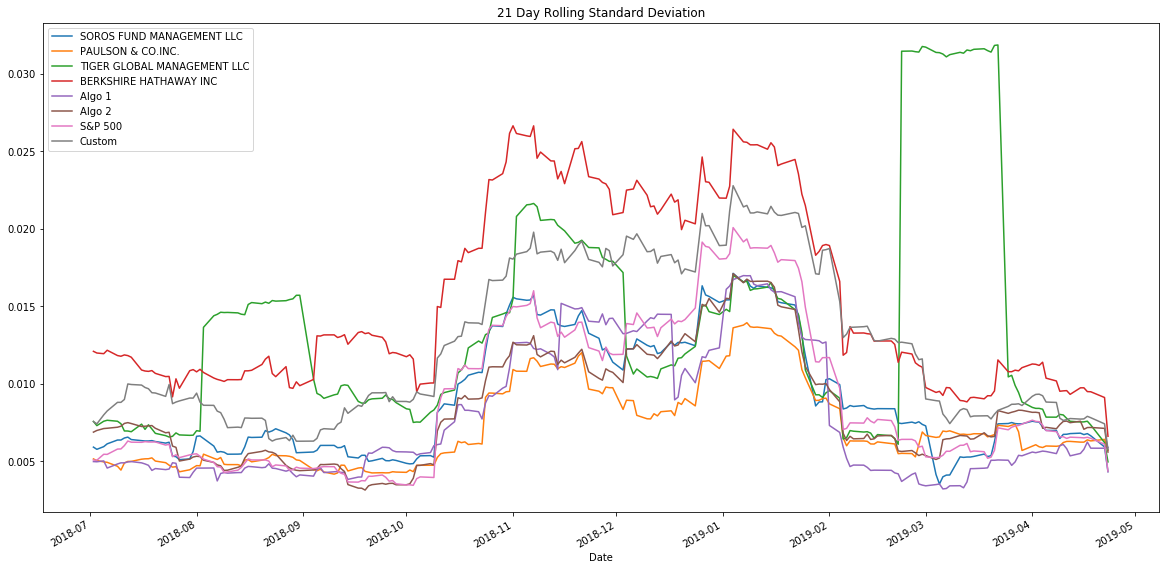

In [363]:
#Rolling Statistics - Risk changes over time. Analyze the rolling statistics for Risk and Beta.
#Calculate and plot the rolling standard deviation for the S&P 500 and custom portfolios using a 21 trading day window

#sorting before the moving averages
custom_all_portfolios_df = custom_all_portfolios.sort_index()
#Calculating rolling std using 21 trading day window
rolling_std_custom = custom_all_portfolios_df.rolling(window=21).std().plot(title = '21 Day Rolling Standard Deviation', figsize =[20,10])
#plotting
rolling_std_custom

In [364]:
#5. Calculate the Sharpe ratios by computing the quotient of `annualized average return` and `annualized standard deviation`.
sharpe_ratios_custom = (custom_all_portfolios.mean() * 252) / custom_annualized_std
sharpe_ratios_custom

SOROS FUND MANAGEMENT LLC      0.508670
PAULSON & CO.INC.              0.263794
TIGER GLOBAL MANAGEMENT LLC   -1.051599
BERKSHIRE HATHAWAY INC         0.095392
Algo 1                         2.127500
Algo 2                        -0.025824
S&P 500                        0.590856
Custom                         0.315685
dtype: float64

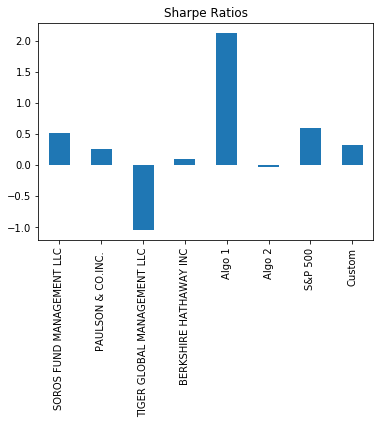

In [365]:
#6. Plot the Sharpe ratios using a bar chart.
sharpe_ratios_custom.plot(kind="bar", title="Sharpe Ratios")

In [366]:
#On the basis of this performance metric, do custom portfolio outperform the market, the whales and the algos? 
for i in range(len(sharpe_ratios_custom)):
    if(sharpe_ratios_custom['Custom'] > sharpe_ratios_custom[i]):      
        tag_custom = "Custom portfolio outperforms whales, algos and market since Sharpe Ratio of Custom is higher than others"  
    else:
        tag_custom = "Custom portfolio underperforms whales, algos and market since Sharpe Ratio of Custom is higher than others"
print(f" {tag_custom}")

 Custom portfolio underperforms whales, algos and market since Sharpe Ratio of Custom is higher than others


In [367]:
#Construct a correlation table
correlation_table = custom_all_portfolios.corr()
correlation_table

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.790770,0.473260,0.821998,0.348391,0.866416,0.879326,0.727437
PAULSON & CO.INC.,0.790770,1.000000,0.481099,0.655047,0.370544,0.785889,0.769280,0.634447
TIGER GLOBAL MANAGEMENT LLC,0.473260,0.481099,1.000000,0.323286,0.120720,0.403860,0.474863,0.368353
BERKSHIRE HATHAWAY INC,0.821998,0.655047,0.323286,1.000000,0.335309,0.786409,0.854485,0.831897
Algo 1,0.348391,0.370544,0.120720,0.335309,1.000000,0.383090,0.302867,0.280661
Algo 2,0.866416,0.785889,0.403860,0.786409,0.383090,1.000000,0.876065,0.742143
S&P 500,0.879326,0.769280,0.474863,0.854485,0.302867,0.876065,1.000000,0.867651
Custom,0.727437,0.634447,0.368353,0.831897,0.280661,0.742143,0.867651,1.000000


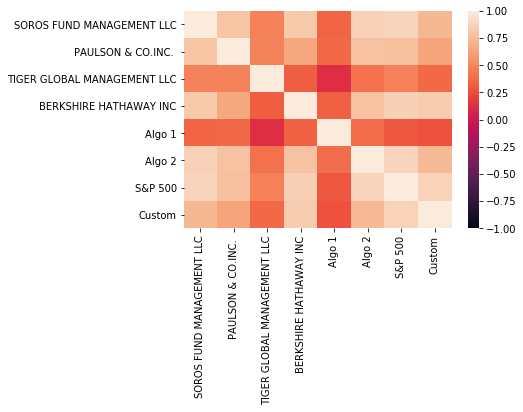

In [368]:
#correlation matrix using a heatmap
sns.heatmap(correlation_table, vmax=1, vmin=-1)

In [369]:
#Calculate Beta for custom portfolio compared to the total market (S&P 500)

#Calculate the total variance of the S&P 500 daily returns.
total_var_custom =custom_all_portfolios["S&P 500"].var()
#Calculate the overall covariances of custom portfolio to that of the S&P 500. 
cov_custom = custom_all_portfolios['Custom'].cov(custom_all_portfolios['S&P 500'])
#Calculate the overall beta values of each social media stock.
beta_custom = cov_custom / total_var_custom
print(beta_custom)

1.1483342640709262


In [370]:
# Analysis of beta
if beta_custom >1:
    print(f"Custom Portfolio is more volatile than the market")
elif beta_custom == 1:    
    print(f"Custom Portfolio is exactly as volatile as the market")
elif beta_custom >0 and beta_custom<1:    
    print(f"Custom Portfolio is less volatile than the market")
elif beta_custom == 0:    
    print(f"Custom Portfolio is uncorrelated to the market")
elif beta_custom < 0:    
    print(f"Custom Portfolio is negatively uncorrelated to the market")

Custom Portfolio is more volatile than the market


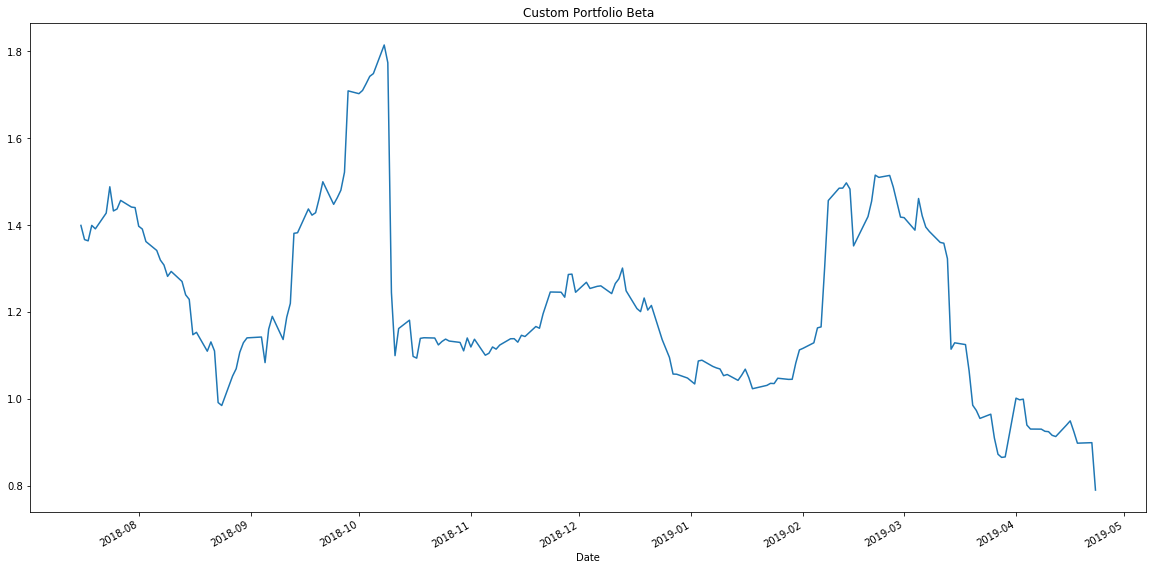

In [309]:
# Calculate a rolling window . 
rolling_variance = custom_all_portfolios["S&P 500"].rolling(window=30).var()
rolling_covariance = custom_all_portfolios["Custom"].rolling(window=30).cov(combined_portfolios_df["S&P 500"])
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(title="Custom Portfolio Beta", figsize=[20,10])